In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
# read data and rename target column
data = pd.read_csv('selected_data.csv').drop(columns=['Unnamed: 0']) 
data.rename(columns={"class":"is_spam"}, inplace=True)

In [3]:
# split into X and y
X = data.drop("is_spam", axis = 1)
y = data.is_spam.values.astype(int)

In [4]:
# scale the features
object= StandardScaler()
scale = object.fit_transform(X)

In [5]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [6]:
# Model building

# using cost C=1
model = SVC(C=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

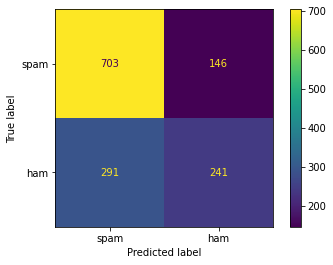

In [7]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels={'ham','spam'})
disp.plot()

plt.show()

In [8]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

accuracy 0.6835626357711803
precision 0.6227390180878553



  ___________________________________________________________________________________________________________________________________________



















Grid Search to Find Optimal Hyperparameter C

In [9]:
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

model = SVC()

# set up grid search scheme
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'accuracy',
                       return_train_score=True)  

In [10]:
# fit the model
model_cv.fit(X_train, y_train)  

GridSearchCV(estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='accuracy')

In [11]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)

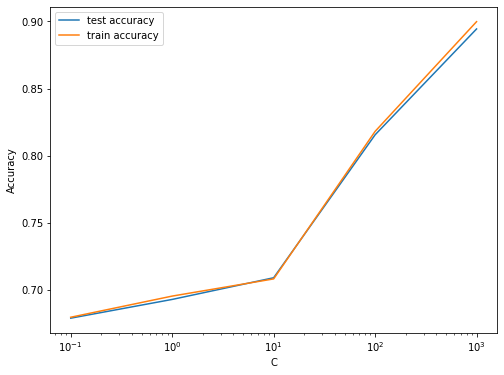

In [12]:
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
plt.show()

In [13]:
# Model building
# using cost C=1000
model = SVC(C=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

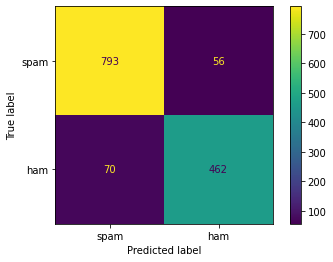

In [14]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels={'ham','spam'})
disp.plot()

plt.show()

In [15]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

# precision
print("precision", metrics.precision_score(y_test, y_pred))

accuracy 0.9087617668356264
precision 0.8918918918918919
